In [1]:
from src.litemedsam.build_sam import MedSAM_Lite, build_sam_vit_t
litemedsam = build_sam_vit_t('/scratch/project/bollmann_lab/MedSAM_Laptop/checkpoints/LiteMedSAM/lite_medsam.pth')

list(range(len(litemedsam.image_encoder.layers)))

[0, 1, 2, 3]

In [5]:
import os
from glob import glob
data_root = '/QRISdata/Q7010/datasets/train_npy/imgs'
# load all npz files in subdirectories
npz_files = glob(os.path.join(data_root, '*.npy'))
print(f'Found {len(npz_files)} npz files')

Found 20534 npz files


In [6]:
104*1024/len(npz_files)

5.186325119314308

In [8]:
14*1024/(5.186325119314308*2)

1382.0961538461538

In [11]:
from src.segment_anything.build_sam import build_sam_vit_b
medsam = build_sam_vit_b('/scratch/project/bollmann_lab/MedSAM_Laptop/checkpoints/MedSAM/medsam_vit_b.pth')
medsam.image_encoder.blocks[0].attn.qkv

Linear(in_features=768, out_features=2304, bias=True)

In [19]:
import SimpleITK as sitk
from glob import glob
import matplotlib.pyplot as plt
import os

In [8]:
imgs_path = '/QRISdata/Q7010/datasets/Micro_Ultrasound_Prostate_Segmentation_Dataset/train/micro_ultrasound_scans'
imgs_files = sorted(glob(f'{imgs_path}/*'))
gts_path = '/QRISdata/Q7010/datasets/Micro_Ultrasound_Prostate_Segmentation_Dataset/train/expert_annotations'
gts_files = sorted(glob(f'{gts_path}/*'))
print(len(imgs_files),  len(gts_files))
print(imgs_files[0])
print(gts_files[0])

55 55
/QRISdata/Q7010/datasets/Micro_Ultrasound_Prostate_Segmentation_Dataset/train/micro_ultrasound_scans/microUS_train_01.nii.gz
/QRISdata/Q7010/datasets/Micro_Ultrasound_Prostate_Segmentation_Dataset/train/expert_annotations/expert_annotation_train_01.nii.gz


In [10]:
imgs = sitk.ReadImage(imgs_files[0])
imgs_array = sitk.GetArrayFromImage(imgs)
gts = sitk.ReadImage(gts_files[0])
gts_array = sitk.GetArrayFromImage(gts)
print(imgs_array.shape, gts_array.shape)

(45, 962, 1372) (45, 962, 1372)


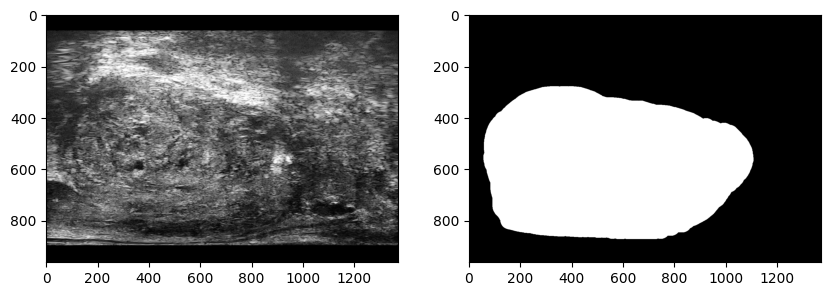

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(imgs_array[22], cmap='gray')
ax[1].imshow(gts_array[22], cmap='gray')

In [21]:
os.path.basename(imgs_files[0])

'microUS_train_01.nii.gz'

In [45]:
us_npx = '/scratch/project/bollmann_lab/MedSAM_Laptop/datasets/train_npz/US/Breast-Ultrasound'
us_files = sorted(glob(f'{us_npx}/*'))
us_img = np.load(us_files[0])['imgs']
us_gt = np.load(us_files[0])['gts']

In [46]:
us_img.shape, us_gt.shape

((471, 562, 3), (471, 562))

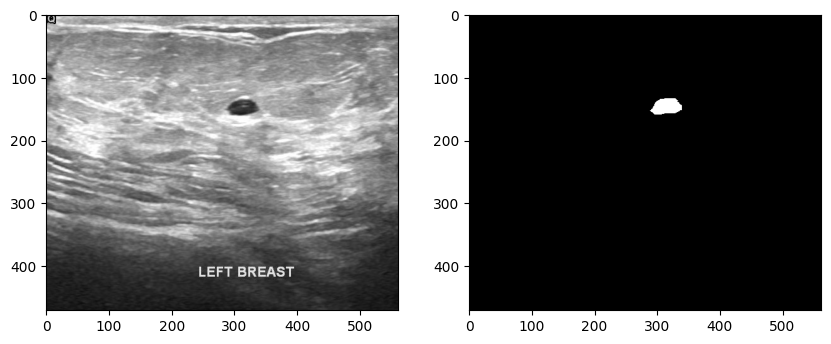

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(us_img, cmap='gray')
ax[1].imshow(us_gt, cmap='gray')